In [1]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)
model = 'tranvae'

dir_path = os.path.expanduser(f'~/Documents/benchmarking_results/figure_5/{model}/ood_2/')
save_path = f'{dir_path}revision_class/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [3]:
ref = sc.read(f'{dir_path}reference_data.h5ad')
ref

AnnData object with n_obs × n_vars = 18530 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
f1 = sc.read(f'{dir_path}full_1_data.h5ad')
f1.obs.batch = f1.obs.batch.replace('10X', '10X (query)')
f1.obs.celltype = f1.obs.celltype.replace('NK cells', 'NK cells NEW')
f1.obs.predictions = f1.obs.predictions.replace('NK cells', 'NK cells NEW')
f1.obs.celltype = f1.obs.celltype.replace('NKT cells', 'NKT cells NEW')
f1.obs.predictions = f1.obs.predictions.replace('NKT cells', 'NKT cells NEW')
f1

AnnData object with n_obs × n_vars = 29257 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
p_b = sns.color_palette("husl", 9)
p_c = sns.color_palette("hls", 16)
batch_color = [p_b[1],p_b[2],p_b[3],p_b[4],p_b[5],p_b[6],p_b[7],p_b[8]]
ct_color = [p_c[0],p_c[2],p_c[3],p_c[4],p_c[5],p_c[6],p_c[7],p_c[8],p_c[9],p_c[10],p_c[11],p_c[14],p_c[15]]

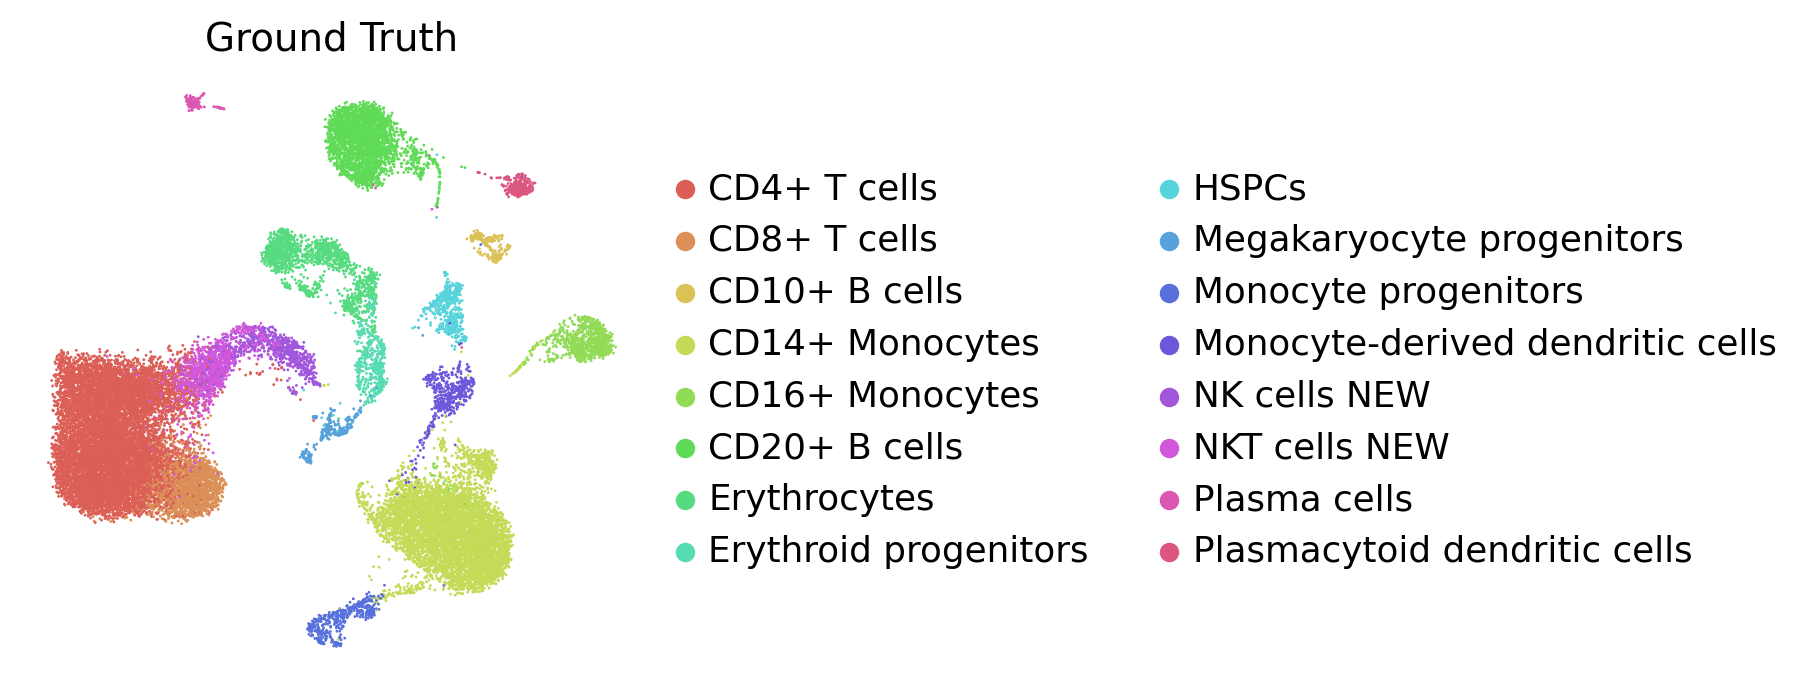

In [6]:
sc.pl.umap(
    f1,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='Ground Truth',
    palette=p_c
)
plt.savefig(f"{save_path}truth.pdf", bbox_inches='tight')

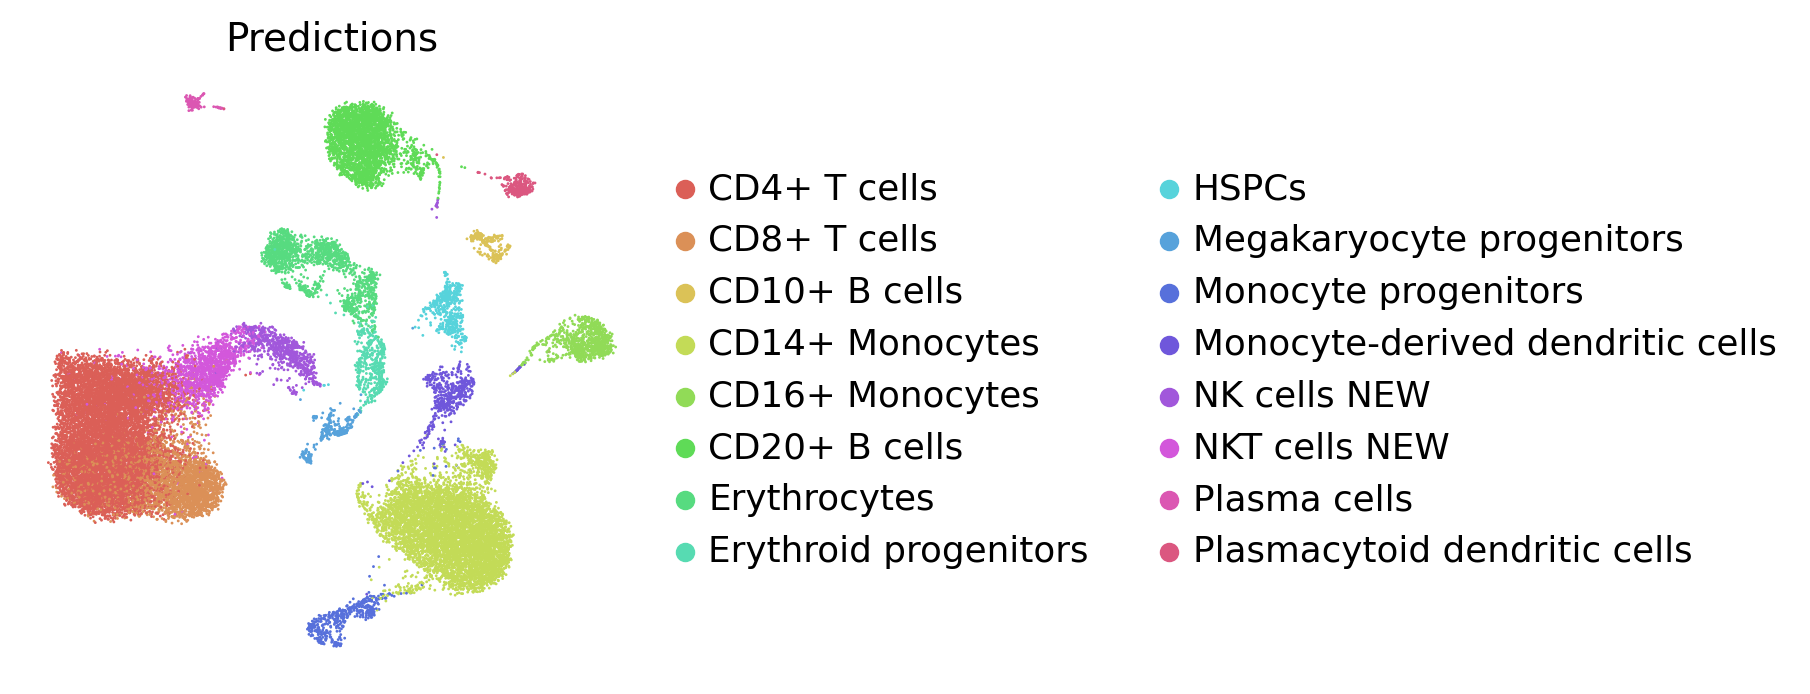

In [7]:
sc.pl.umap(
    f1,
    color="predictions",
    frameon=False,
    ncols=1,
    show=False,
    title='Predictions',
    palette=p_c
)
plt.savefig(f"{save_path}pred.pdf", bbox_inches='tight')

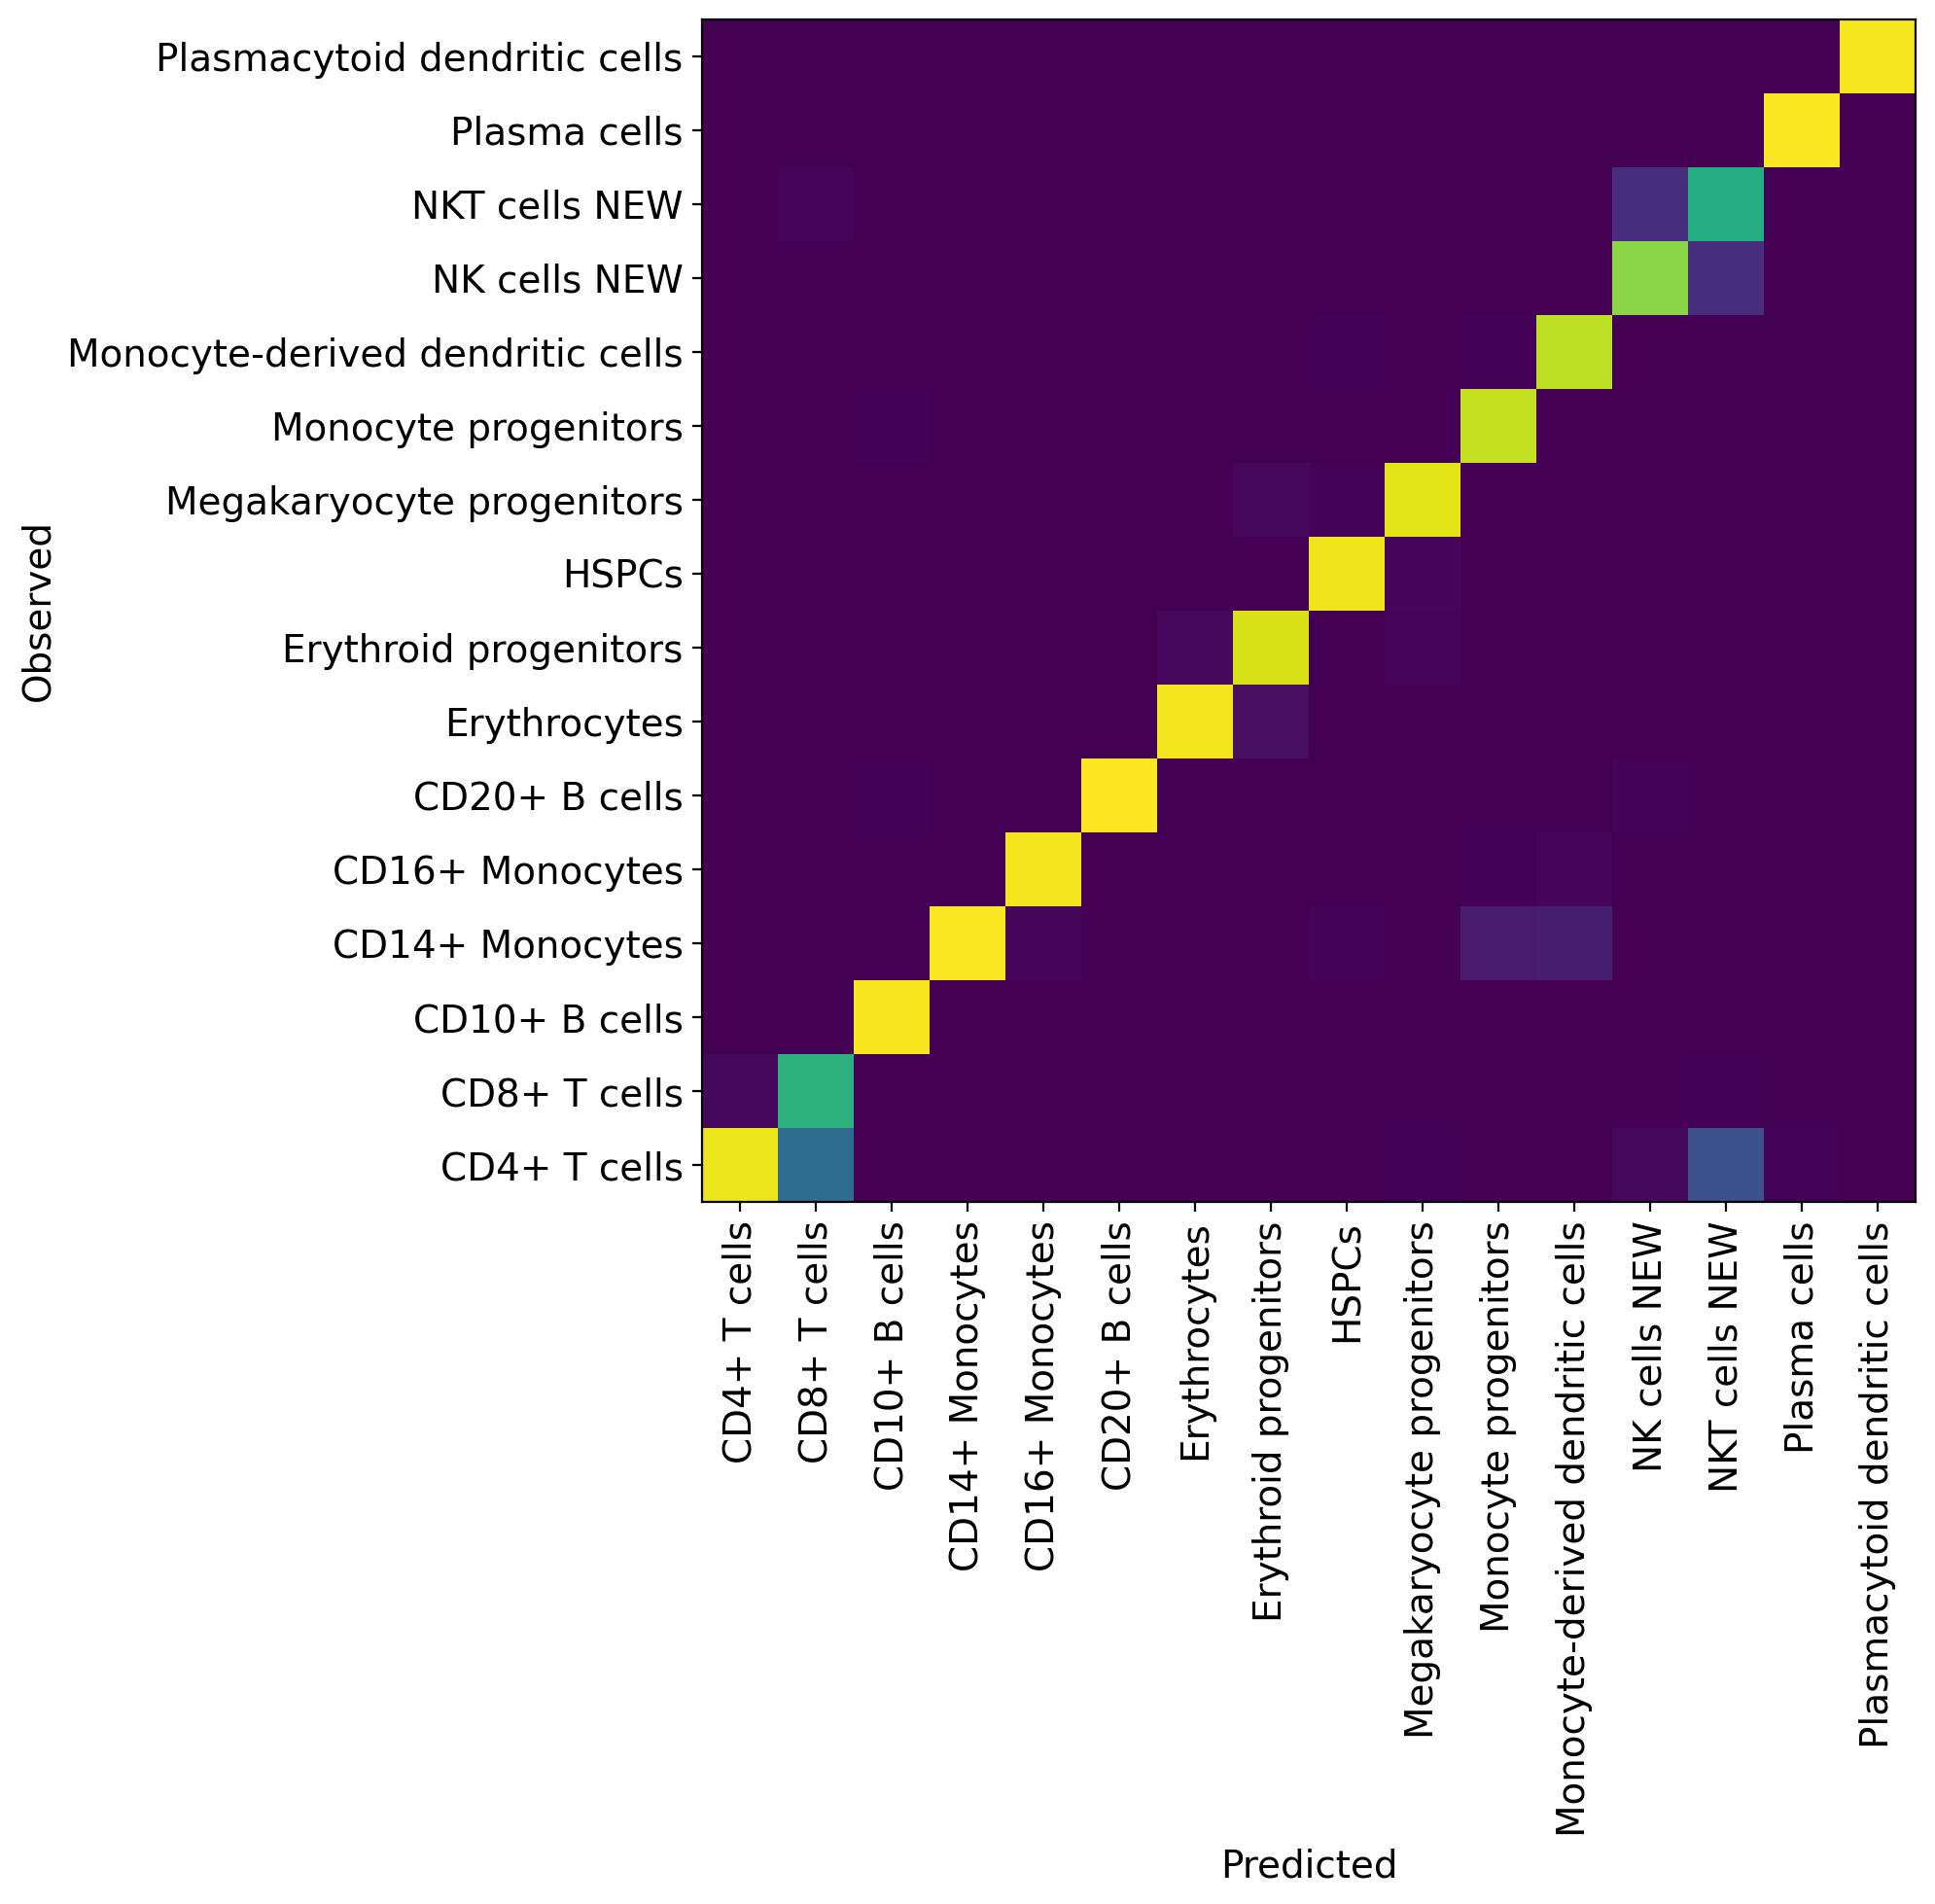

In [8]:
df = f1.obs.groupby(["celltype", "predictions"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.savefig(f"{save_path}table.pdf", bbox_inches='tight')